# Plot hyperoptimization results

## Import section

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

## Loading base dataframe

In [2]:
results_csv_path = "results/tox21_ptree/edge/cistrans/results.csv"

In [3]:
main_df = pd.read_csv(results_csv_path)
display(main_df)

,train_accuracy-0_0,train_accuracy-0_5,train_ap,train_auc,train_mean_loss,train_sum_loss,val_accuracy-0_0,val_accuracy-0_5,val_ap,val_auc,...,pid,hostname,node_ip,time_since_restore,iterations_since_restore,config/model/hidden_dimension,config/model/modules/1/times,config/model/modules/1/parameter/dropout,config/optimizer/base_learning_rate,logdir
0,0.08,0.92,0.23,0.71,0.238104,40.477618,0.07,0.93,0.25,0.71,...,3436,AT-MB-PC-EOS,127.0.0.1,11228.196038,100,64,3,0.5,0.00001,ba9a7d23
1,0.08,0.92,0.19,0.70,0.236539,40.211635,0.07,0.93,0.21,0.68,...,30192,AT-MB-PC-EOS,127.0.0.1,3035.637568,15,256,6,0.5,0.00100,d4bacb71
2,0.08,0.92,0.23,0.71,0.238147,40.484967,0.07,0.93,0.25,0.71,...,41488,AT-MB-PC-EOS,127.0.0.1,11233.225355,100,64,3,0.5,0.00001,54e8b6f2
3,0.08,0.61,0.08,0.50,0.648727,110.283614,0.07,0.70,0.10,0.50,...,36192,AT-MB-PC-EOS,127.0.0.1,1041.517936,5,64,6,0.5,0.00001,f7fd3eec
4,0.08,0.94,0.61,0.91,0.149791,25.464427,0.07,0.94,0.39,0.80,...,11600,AT-MB-PC-EOS,127.0.0.1,11215.635736,100,64,3,0.0,0.00010,f28b4280
5,0.08,0.94,0.54,0.88,0.164725,28.003201,0.07,0.93,0.38,0.80,...,31368,AT-MB-PC-EOS,127.0.0.1,11737.625965,100,256,3,0.5,0.00100,7574279b
6,0.08,0.91,0.11,0.52,0.342035,58.145919,0.07,0.91,0.11,0.54,...,31196,AT-MB-PC-EOS,127.0.0.1,1637.273666,5,256,10,0.5,0.00010,d2da55b0
7,0.08,0.74,0.10,0.51,0.539162,91.657538,0.07,0.80,0.11,0.52,...,40624,AT-MB-PC-EOS,127.0.0.1,1639.113916,5,256,10,0.2,0.00001,4cc8a78d
8,0.08,0.91,0.11,0.54,0.321433,54.643609,0.07,0.91,0.13,0.53,...,16816,AT-MB-PC-EOS,127.0.0.1,1022.287108,5,64,6,0.2,0.00010,cd24a016
9,0.08,0.81,0.08,0.45,0.476866,81.067261,0.07,0.86,0.10,0.44,...,23224,AT-MB-PC-EOS,127.0.0.1,557.654912,5,256,3,0.5,0.00001,2d7a83f1


In [9]:
storage_dir = os.path.dirname(results_csv_path)

In [12]:
# load all dataframes
df_collection = {}
for trial_name in main_df.logdir:
    df_collection[trial_name] = pd.read_csv(os.path.join(storage_dir, f"{trial_name}.csv"))

## Plot all trials

In [13]:
metric = 'auc'

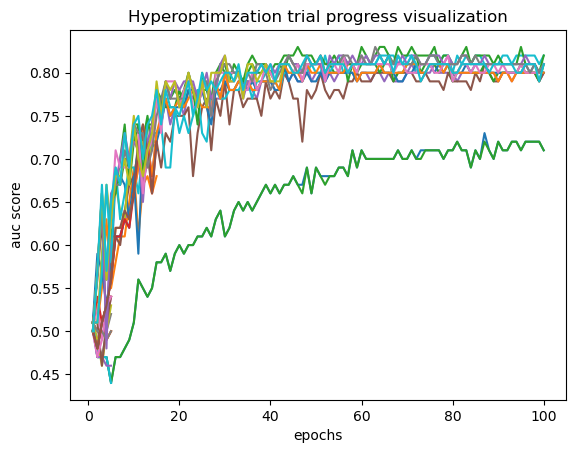

In [22]:
plt.figure()
for trial_name, trial_df in df_collection.items():
    plt.plot(trial_df.index+1, trial_df[f"val_{metric}"], label=trial_name)
plt.title("Hyperoptimization trial progress visualization")
plt.xlabel("epochs")
plt.ylabel(f"{metric} score")
plt.show()